In [1]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn import metrics
#from sklearn.linear_model import LogisticRegression
import logging,sys


In [2]:
df = pd.read_csv("binary.csv")



In [3]:
df["rank"].describe()

count    400.00000
mean       2.48500
std        0.94446
min        1.00000
25%        2.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: rank, dtype: float64

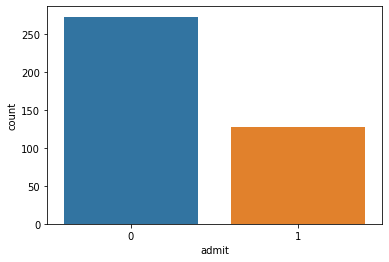

In [4]:
import seaborn as sns
sns.countplot(x="admit",data=df)

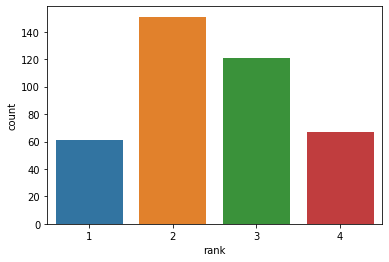

In [5]:
sns.countplot(x="rank",data=df)

In [6]:
df["rank"].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

In [7]:
df["rank"].unique()

array([3, 1, 4, 2])

In [8]:

#Splitting independent data and targeted data as test and train
X_train, X_test, Y_train, Y_test= train_test_split(df[["gpa","gre","rank"]],
                                                   df[["admit"]],test_size=0.2,
                                                   random_state=66)


In [13]:

from sklearn.tree import DecisionTreeClassifier
clf_entropy=DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, max_depth=10) #gini

clf_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:

#predicting test data values for clf_entropy model
predicted_entropy = clf_entropy.predict(X_test)

In [15]:
#Confusion Matrix
from  sklearn.metrics import confusion_matrix 
cM = confusion_matrix(Y_test,predicted_entropy)
print(cM)
#generic matrix
tp, fp, fn, tn = cM.ravel()
recall = tp/(tp+fn)
precision=tp/(tp+fp)
print("Recall = Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
print("Precision=",tp/(tp+fp))
f1score= 2 *(recall*precision)/(precision+recall)
print("f1 score=", f1score)


[[48 12]
 [13  7]]
Recall = Sensitivity =  0.7868852459016393
Specificity = 0.3684210526315789
Accuracy= 0.6875
Precision= 0.8
f1 score= 0.7933884297520661


[Text(122.68125, 207.55636363636364, 'X[0] <= 3.355\nentropy = 0.919\nsamples = 320\nvalue = [213, 107]'),
 Text(59.4, 187.7890909090909, 'X[1] <= 570.0\nentropy = 0.772\nsamples = 150\nvalue = [116, 34]'),
 Text(19.8, 168.0218181818182, 'X[2] <= 2.5\nentropy = 0.604\nsamples = 88\nvalue = [75, 13]'),
 Text(7.2, 148.25454545454545, 'X[1] <= 350.0\nentropy = 0.779\nsamples = 39\nvalue = [30, 9]'),
 Text(3.6, 128.48727272727274, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(10.8, 128.48727272727274, 'X[1] <= 470.0\nentropy = 0.711\nsamples = 36\nvalue = [29, 7]'),
 Text(7.2, 108.72, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(14.4, 108.72, 'X[1] <= 510.0\nentropy = 0.871\nsamples = 24\nvalue = [17, 7]'),
 Text(7.2, 88.95272727272729, 'X[0] <= 2.645\nentropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(3.6, 69.18545454545455, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(10.8, 69.18545454545455, 'X[0] <= 3.075\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 T

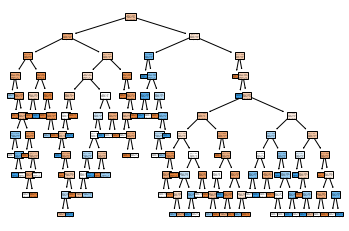

In [19]:
from sklearn.tree import plot_tree
plot_tree(clf_entropy,filled=True)  # for decision tree only